In [1]:
import numpy as np 
from google.colab import files
import io
import pandas as pd


In [2]:
uploaded = files.upload()

Saving train.txt to train.txt


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['train.txt'] ), sep=" " ,  header = None)
print(df)

   0    1  2
0  1  1.0  1
1  1 -1.0  1
2  2  2.5  2
3  0  2.0  2
4  2  3.0  2
5  4  5.0  2


In [4]:
training_set = df.to_numpy()
print(training_set)

[[ 1.   1.   1. ]
 [ 1.  -1.   1. ]
 [ 2.   2.5  2. ]
 [ 0.   2.   2. ]
 [ 2.   3.   2. ]
 [ 4.   5.   2. ]]


In [7]:
k = 0
j=0
w1=np.zeros((2,3))
w2=np.zeros((2,4))
for i in range (len(training_set)):
  if  training_set[i][2] ==1 :
    w1[0][k]=training_set[i][0]
    w1[1][k]= training_set[i][1]
    k=k+1

  else :
    w2[0][j]=training_set[i][0]
    w2[1][j]= training_set[i][1]
    j=j+1

print (w1)  
print (w2)  


[[ 1.  1.  0.]
 [ 1. -1.  0.]]
[[2.  0.  2.  4. ]
 [2.5 2.  3.  5. ]]


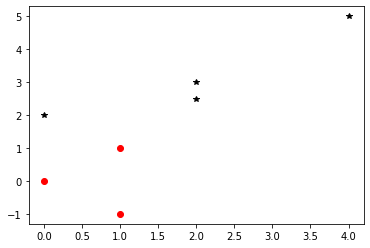

In [8]:
import matplotlib.pyplot as plt
plt.plot(w1[0],w1[1], 'ro')
plt.plot(w2[0],w2[1], 'k*')

In [ ]:
#higher dimension transfer
y=np.zeros((6,6))
for i in range (3):
  for j in range (6):
    if j==0:
      y[i][j]=w1[0][i]*w1[0][i]
    elif j==1:
      y[i][j]=w1[1][i]*w1[1][i]
    elif j==2:
      y[i][j]=w1[1][i]*w1[0][i]    
    elif j==3:
      y[i][j]=w1[0][i]
    elif j==4:
      y[i][j]=w1[1][i]
    elif j==5:  
      y[i][j]=1
#print(y)
k=0    
for i in range (3,6):
  for j in range (6):
    if j==0:
      y[i][j]=-w2[0][k]*w2[0][k]
    elif j==1:
      y[i][j]=-w2[1][k]*w2[1][k]
    elif j==2:
      y[i][j]=-w2[1][k]*w2[0][k]    
    elif j==3:
      y[i][j]=-w2[0][k]
    elif j==4:
      y[i][j]=-w2[1][k]
    elif j==5:  
      y[i][j]=-1
  k=k+1    


In [ ]:
#avoiding -0 
for i in range (6):
  for j in range (6):
    if y[i][j]== -0 :
      y[i][j]=0
print(y)    

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [ 0.   -4.    0.    0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]]


In [ ]:
def oneatatime (alpha,w):
  count=0
  while count < 200 :
    flag=0
    count+=1
    for i in range (6):
      temp=np.array(y[i])
      res = np.dot(temp,w.T)
      if res <= 0:
        w=w+alpha*y[i]
      else :
        flag+=1
    if flag == 6:
      break 
  print (w)
  print (count)
  return w,count







In [ ]:
def manyatatime(alpha,w):
  count = 0
  while count < 200 :
    flag=0
    count+=1
    markUnclassified=np.zeros((1,6))
    for i in range (6):
      temp=np.array(y[i])
      res = np.dot(temp,w.T)
      if res <= 0:
        markUnclassified+=temp
      else :
        flag+=1
    if flag == 6:
      break
    w=w+alpha*markUnclassified   
  print (w)
  print (count)
  return w , count


In [ ]:
#main Call here 
#check 
wsend=np.zeros((1,6))
ans,acount=oneatatime(0.8,wsend)
wsend=np.ones((1,6))
ans,acount=manyatatime(0.8,wsend)

[[ 40.  -26.8  17.6  -4.8 -37.6  12.8]]
94
[[ 47.4 -31.6  21.   -3.8 -40.2   7.4]]
91


In [ ]:
#task4
#for w is consistent of ones
wsend=np.ones((1,6))
from astropy.table import QTable, Table, Column
from astropy import units as u
t = Table()
t = Table(names=('Alpha', 'One At a Time', 'Many At a Time'), dtype=('f4', 'i4', 'i4'))
list1=[]
list2=[]
for i in np.arange(0.1,1.1,0.1):
  ans1,acount1=oneatatime(i,wsend)
  list1.append(acount1)
  ans2,acount2=manyatatime(i,wsend)
  t.add_row((i, acount1, acount2))
  list2.append(acount2)

print(t)
print(list1)
print(list2)


[[ 1.    -1.025  0.7    0.2   -0.75   0.1  ]]
6
[[ 6.5   -4.425  2.8   -0.5   -5.45   1.2  ]]
102
[[10.  -6.7  4.4 -1.2 -9.4  3.2]]
92
[[ 13.    -8.85   5.6   -1.   -10.9    2.4 ]]
104
[[ 16.3 -10.7   6.7  -2.3 -15.2   5.5]]
104
[[ 17.8   -11.825   7.9    -1.4   -15.05    2.8  ]]
91
[[ 22.2 -14.3   9.8  -2.6 -20.4   7.4]]
106
[[ 26.6 -18.   11.4  -2.2 -22.6   5.4]]
116
[[ 25.   -16.75  11.    -3.   -23.5    8.  ]]
93
[[ 32.5   -22.125  14.     -2.5   -27.25    6.   ]]
105
[[ 29.2 -18.5  12.4  -4.4 -27.8   9.4]]
93
[[ 40.  -26.9  17.2  -3.2 -33.8   8.2]]
114
[[ 38.8   -25.075  17.1    -4.6   -35.75   12.9  ]]
108
[[ 41.6   -27.525  18.5    -3.2   -35.05    6.6  ]]
91
[[ 45.8 -31.2  19.4  -5.4 -42.6  16.2]]
115
[[ 47.4 -31.6  21.   -3.8 -40.2   7.4]]
91
[[ 45.1  -30.05  19.9   -5.3  -42.2   14.5 ]]
94
[[ 57.7  -38.15  25.3   -5.3  -49.4   10.  ]]
105
[[ 50.  -33.5  22.   -6.  -47.   16. ]]
94
[[ 60.   -38.75  25.    -4.   -51.5   10.  ]]
93
Alpha One At a Time Many At a Time
----- ------

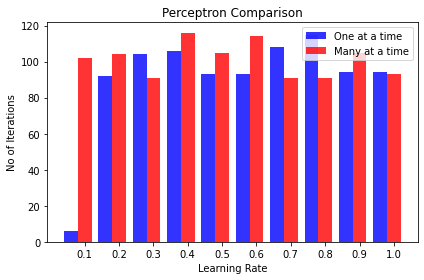

In [ ]:

import matplotlib.pyplot as plt

# data to plot
n_groups = 10

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.8

bar1 = plt.bar(index, list1, bar_width,
alpha=opacity,
color='b',
label='One at a time')

bar2 = plt.bar(index + bar_width, list2, bar_width,
alpha=opacity,
color='r',
label='Many at a time')

plt.xlabel('Learning Rate')
plt.ylabel('No of Iterations')
plt.title('Perceptron Comparison')
plt.xticks(index + bar_width, ('0.1', '0.2', '0.3', '0.4','0.5','0.6','0.7','0.8','0.9','1.0'))
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#w is consistent of 0 
wsend2=np.zeros((1,6))
t2 = Table()
t2 = Table(names=('Alpha', 'One At a Time', 'Many At a Time'), dtype=('f4', 'i4', 'i4'))
list1_2=[]
list2_2=[]
for i in np.arange(0.1,1.1,0.1):
  ans1,acount1=oneatatime(i,wsend2)
  list1_2.append(acount1)
  ans2,acount2=manyatatime(i,wsend2)
  t2.add_row((i, acount1, acount2))
  list2_2.append(acount2)

print(t2)
print(list1_2)
print(list2_2)


[[ 5.   -3.35  2.2  -0.6  -4.7   1.6 ]]
94
[[ 6.5   -4.425  2.8   -0.5   -5.45   1.2  ]]
105
[[10.  -6.7  4.4 -1.2 -9.4  3.2]]
94
[[ 13.    -8.85   5.6   -1.   -10.9    2.4 ]]
105
[[ 15.   -10.05   6.6   -1.8  -14.1    4.8 ]]
94
[[ 18.    -11.625   7.5    -1.2   -15.45    3.   ]]
92
[[ 20.  -13.4   8.8  -2.4 -18.8   6.4]]
94
[[ 26.  -17.7  11.2  -2.  -21.8   4.8]]
105
[[ 25.   -16.75  11.    -3.   -23.5    8.  ]]
94
[[ 30.    -19.375  12.5    -2.    -25.75    5.   ]]
92
[[ 30.  -20.1  13.2  -3.6 -28.2   9.6]]
94
[[ 39.   -26.55  16.8   -3.   -32.7    7.2 ]]
105
[[ 35.   -23.45  15.4   -4.2  -32.9   11.2 ]]
94
[[ 45.5   -30.975  19.6    -3.5   -38.15    8.4  ]]
105
[[ 40.  -26.8  17.6  -4.8 -37.6  12.8]]
94
[[ 52.  -35.4  22.4  -4.  -43.6   9.6]]
105
[[ 45.   -30.15  19.8   -5.4  -42.3   14.4 ]]
94
[[ 58.5   -39.825  25.2    -4.5   -49.05   10.8  ]]
105
[[ 50.  -33.5  22.   -6.  -47.   16. ]]
94
[[ 60.   -38.75  25.    -4.   -51.5   10.  ]]
92
Alpha One At a Time Many At a Time
----- --

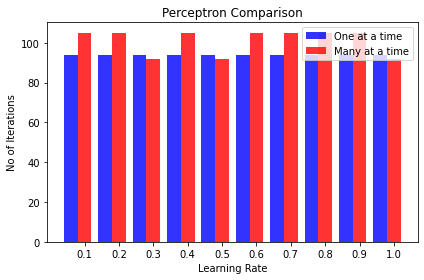

In [ ]:
bar1 = plt.bar(index, list1_2, bar_width,
alpha=opacity,
color='b',
label='One at a time')

bar2 = plt.bar(index + bar_width, list2_2, bar_width,
alpha=opacity,
color='r',
label='Many at a time')

plt.xlabel('Learning Rate')
plt.ylabel('No of Iterations')
plt.title('Perceptron Comparison')
plt.xticks(index + bar_width, ('0.1', '0.2', '0.3', '0.4','0.5','0.6','0.7','0.8','0.9','1.0'))
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

# generate random integer values
from random import seed
from random import randint
seed(9)
value = randint(0,20)
print(value)
wsend3=np.zeros((1,6))
wsend3=wsend3+value


14


In [ ]:
#randomly initialized with seed fixed w 
t3 = Table()
t3 = Table(names=('Alpha', 'One At a Time', 'Many At a Time'), dtype=('f4', 'i4', 'i4'))
list1_3=[]
list2_3=[]
for i in np.arange(0.1,1.1,0.1):
  ans1,acount1=oneatatime(i,wsend3)
  list1_3.append(acount1)
  ans2,acount2=manyatatime(i,wsend3)
  t3.add_row((i, acount1, acount2))
  list2_3.append(acount2)

print(t3)
print(list1_3)
print(list2_3)

[[ 9.6   -8.425  4.3    1.    -6.35   3.8  ]]
78
[[ 9.6  -8.55  4.4   1.   -6.5   3.7 ]]
88
[[10.8  -9.25  5.4   0.4  -8.1   2.8 ]]
42
[[11.6  -9.65  5.8   0.8  -7.9   3.  ]]
48
[[11.9  -9.85  6.5  -0.1  -9.7   2.  ]]
31
[[ 14.6   -11.425   7.7    -0.4   -11.35    2.   ]]
43
[[ 10.8 -10.    6.    1.2  -8.    2.8]]
21
[[ 25.6 -18.6  12.8  -2.4 -21.2   4. ]]
90
[[ 27.5   -18.625  13.     -3.5   -24.25    7.5  ]]
85
[[ 29.5  -21.25  14.5   -2.5  -23.5    4.5 ]]
76
[[ 31.4  -20.95  15.2   -4.6  -28.3    7.4 ]]
79
[[ 36.8  -25.75  18.2   -4.   -30.1    5.  ]]
83
[[ 37.8  -24.85  18.2   -5.6  -34.3    9.8 ]]
88
[[ 41.3  -29.75  20.3   -3.5  -32.9    6.3 ]]
80
[[ 45.2 -30.4  21.2  -6.  -40.4  13.2]]
97
[[ 16.4 -15.    9.2   3.6 -12.    2.8]]
13
[[ 15.8   -14.575  11.3     1.4   -13.45    0.5  ]]
12
[[ 52.7   -36.175  24.8    -4.9   -44.05    7.7  ]]
84
[[ 55. -39.  25.  -7. -50.  18.]]
102
[[ 62.   -42.25  29.    -6.   -51.5    9.  ]]
90
Alpha One At a Time Many At a Time
----- ------------- 

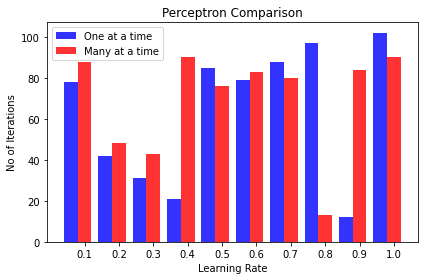

In [ ]:
bar1 = plt.bar(index, list1_3, bar_width,
alpha=opacity,
color='b',
label='One at a time')

bar2 = plt.bar(index + bar_width, list2_3, bar_width,
alpha=opacity,
color='r',
label='Many at a time')

plt.xlabel('Learning Rate')
plt.ylabel('No of Iterations')
plt.title('Perceptron Comparison')
plt.xticks(index + bar_width, ('0.1', '0.2', '0.3', '0.4','0.5','0.6','0.7','0.8','0.9','1.0'))
plt.legend()

plt.tight_layout()
plt.show()